226.34140154512335 [15.06694099  9.3774513 ]


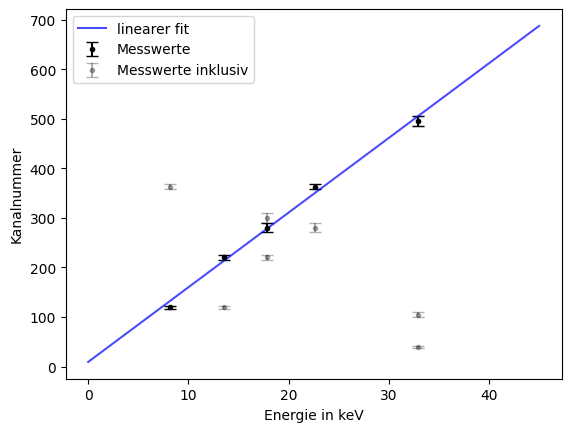

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


#erste messung
# Ag 22.6 keV
Ag_max = 363
Ag_err = 5

# Cu 8.15 keV
Cu_max = 120
Cu_err = 3

# Rb 13.6 keV
Rb_max_1 = 300
Rb_err_1 = 10
Rb_max_2 = 221
Rb_err_2 = 5

# Mo 17.8 keV
Mo_max = 280
Mo_err = 9

# Ba 32.9 keV
Ba_weirdpeak1 = 40
Ba_weirdpeak1_err = 2
Ba_weirdpeak2 = 105
Ba_weirdpeak2_err = 5
Ba_max = 495
Ba_err = 10

# Tb 45.5 keV
# Tb_max = NaN
# Tb_err 

values_y = [Cu_max, Rb_max_2, Mo_max, Ag_max, Ba_max]
values_y_inclusive = [Ag_max, Cu_max,Rb_max_1, Rb_max_2, Mo_max, Ba_weirdpeak1, Ba_weirdpeak2, Ba_max]
values_y_err = [Cu_err, Rb_err_2, Mo_err, Ag_err, Ba_err]
values_y_inclusive_err = [Ag_err, Cu_err, Rb_err_1, Rb_err_2, Mo_err, Ba_weirdpeak1_err, Ba_weirdpeak2_err, Ba_err]
values_x = [8.15, 13.6, 17.8, 22.6, 32.9]
values_x_inclusive = [8.15, 13.6, 17.8, 17.8, 22.6, 32.9, 32.9, 32.9]

def linear(x, m, b):
    return m * x + b

popt, pcov = curve_fit(linear, values_x, values_y, p0 = [1,1])
 

x_dummy = np.linspace(0, 45, 100)

fig, ax = plt.subplots()
ax.errorbar(values_x, values_y, yerr=values_y_err, fmt='.k', label='Messwerte', capsize = 4)
ax.errorbar(values_x_inclusive, values_y_inclusive, yerr=values_y_inclusive_err, fmt='.k', label='Messwerte inklusiv', capsize = 4, alpha=0.3)
ax.plot(x_dummy, linear(x_dummy, *popt), 'b-', label='linearer fit', alpha=0.7)
print(linear(14.4, *popt), popt)
ax.set_xlabel('Energie in keV')
ax.set_ylabel('Kanalnummer')

ax.legend()


# Fehler geschwindigkeiten: 0.055 mm/s bzw 1% der geschwindigkeit

In [34]:
alpha_Eisenoxid_Fe2_O3_peaks_mmps = np.array([-8.528, -5.259, -1.703, 0.9072, 4.5043, 8.2303])
alpha_Eisenoxid_Fe2_O3_peaks_mmps_err = [0.0084, 0.0136, 0.00538, 0.05185, 0.0119, 0.00826]


E_0=14.41*1.602*10**(-16)
c=299792458
mu_g=0.09044*5.05*10**(-27)
e=1.602*10**(-19)
Q = 0.21*10**(-28)
Ergebnis=np.array(E_0/c*alpha_Eisenoxid_Fe2_O3_peaks_mmps*10**(-3))


from sympy import symbols, Eq, solve
mu_a, B, IS, Vzz = symbols('mu_a B IS Vzz')

eq1 = Eq((-mu_a*1+mu_g)*B + e*Q*Vzz/4 + IS,Ergebnis[0])
eq2 = Eq((-mu_a/3+mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[1])
eq3 = Eq((mu_a/3+mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[2])
eq4 = Eq((-mu_a/3-mu_g)*B - e*Q*Vzz/4 + IS,Ergebnis[3])
# # eq5 = Eq((-mu_a*(-1/2)/(3/2)  +   mu_g*(-1/2)/(1/2))*B + e*Q*Vzz/4 + IS,Ergebnis[4])
eq6 = Eq((mu_a-mu_g)*B + e*Q*Vzz/4 + IS,Ergebnis[5])

lsg = solve((eq1, eq2, eq3, eq6), (mu_a, B, IS, Vzz))
print(lsg)

[(-8.00011542288557e-28, -51.3407901255602, -2.25117308554840e-27, 1.31382002056013e+21)]


In [2]:
#hallo
